# Pertemuan 2

Import required packages

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


Read Dataset dan filtering

In [50]:
dataset = pd.read_csv("listings.csv", delimiter=";")
dataset["reviews_per_month"] = dataset["reviews_per_month"].replace(",", ".", regex=True)
dataset = dataset.dropna()
dataset = dataset.astype({"price" : "int", "minimum_nights" : "int", "number_of_reviews" : "int", 
                          "calculated_host_listings_count" : "int", "availability_365" : "int", 
                          "reviews_per_month" : "float"})
print(dataset.dtypes)
print(dataset.isna().values.any())
print(dataset.head())

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                           object
longitude                          object
room_type                          object
price                               int32
minimum_nights                      int32
number_of_reviews                   int32
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int32
availability_365                    int32
dtype: object
False
      id                                 name host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2  266763  Francesca   
1  50646      Pleasant Room along Bukit Timah  227796    Sujatha   
2  56334                          COZICOMFORT  266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) 

Visualisasi data melalui grafik Histrogram

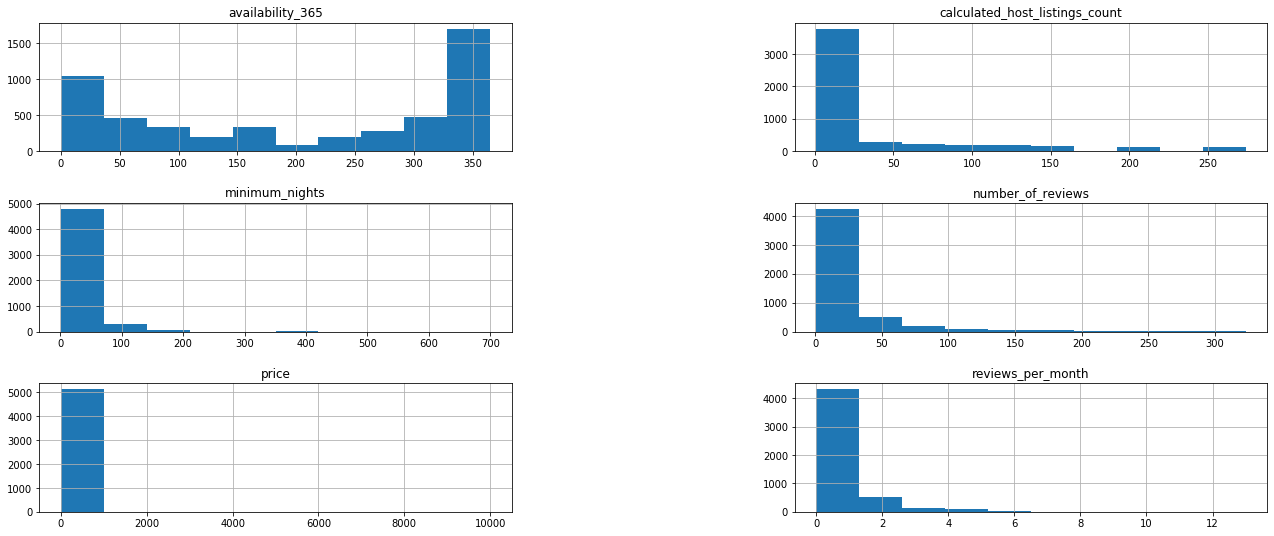

In [51]:
newDataset = dataset[["neighbourhood", "room_type", "price", "minimum_nights", "number_of_reviews", 
                      "last_review", "reviews_per_month", "calculated_host_listings_count", "availability_365"]]
newDataset.hist()
plt.subplots_adjust(hspace = 0.4, wspace = 0.6)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Visualise the data (Scatter)

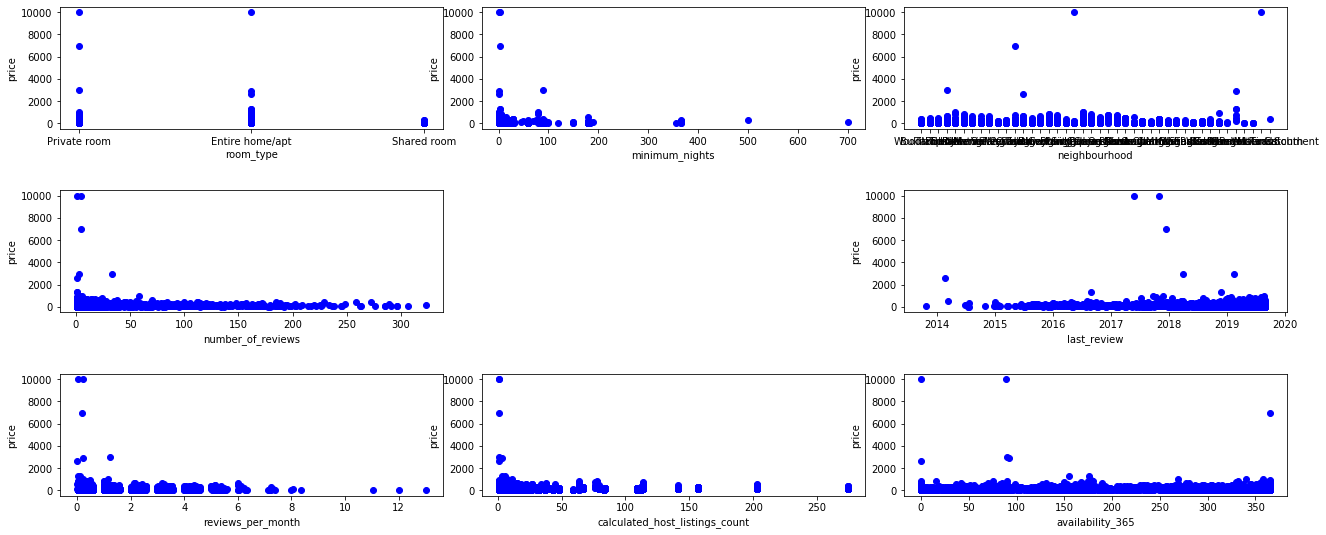

In [44]:
plt.subplot(331)
plt.scatter(newDataset["room_type"], newDataset["price"], color="blue")
plt.xlabel("room_type")
plt.ylabel("price")

plt.subplot(332)
plt.scatter(newDataset["minimum_nights"], newDataset["price"], color="blue")
plt.xlabel("minimum_nights")
plt.ylabel("price")

plt.subplot(333)
plt.scatter(newDataset["neighbourhood"], newDataset["price"], color="blue")
plt.xlabel("neighbourhood")
plt.ylabel("price")

plt.subplot(334)
plt.scatter(newDataset["number_of_reviews"], newDataset["price"], color="blue")
plt.xlabel("number_of_reviews")
plt.ylabel("price")

plt.subplot(336)
plt.scatter(newDataset["last_review"], newDataset["price"], color="blue")
plt.xlabel("last_review")
plt.ylabel("price")

plt.subplot(337)
plt.scatter(newDataset["reviews_per_month"], newDataset["price"], color="blue")
plt.xlabel("reviews_per_month")
plt.ylabel("price")

plt.subplot(338)
plt.scatter(newDataset["calculated_host_listings_count"], newDataset["price"], color="blue")
plt.xlabel("calculated_host_listings_count")
plt.ylabel("price")

plt.subplot(339)
plt.scatter(newDataset["availability_365"], newDataset["price"], color="blue")
plt.xlabel("availability_365")
plt.ylabel("price")

plt.subplots_adjust(hspace = 0.5, wspace = 0.1)
plt.rcParams["figure.figsize"] = [22,9]
plt.show()

# Linear Regression

In [52]:
train, test = train_test_split(newDataset, test_size=0.2)
regression = linear_model.LinearRegression()
regression.fit(train[["number_of_reviews"]], train[["price"]])
print('Coefficients: ', regression.coef_)
print('Intercept: ',regression.intercept_)
print('Train: ',len(train))
print('Test: ',len(test))

Coefficients:  [[-0.25070021]]
Intercept:  [156.97928181]
Train:  4108
Test:  1028


Visualise the regression to the plot

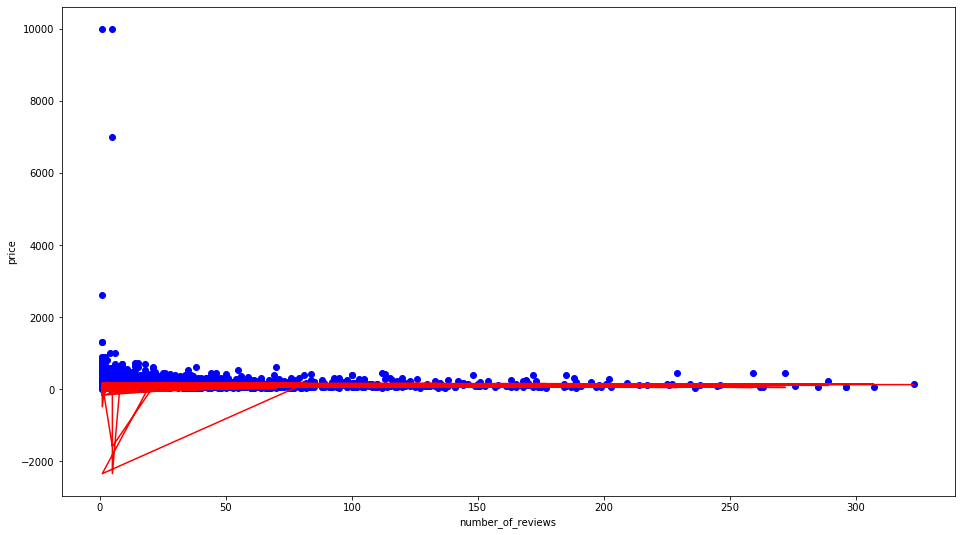

In [53]:
plt.scatter(train["number_of_reviews"], train["price"],  color='blue')
plt.plot(train[["number_of_reviews"]], regression.coef_ * train[["price"]] + regression.intercept_, '-r')
plt.xlabel("number_of_reviews")
plt.ylabel("price")
plt.rcParams["figure.figsize"] = [9,7]
plt.show()

Menunjukkan Plot

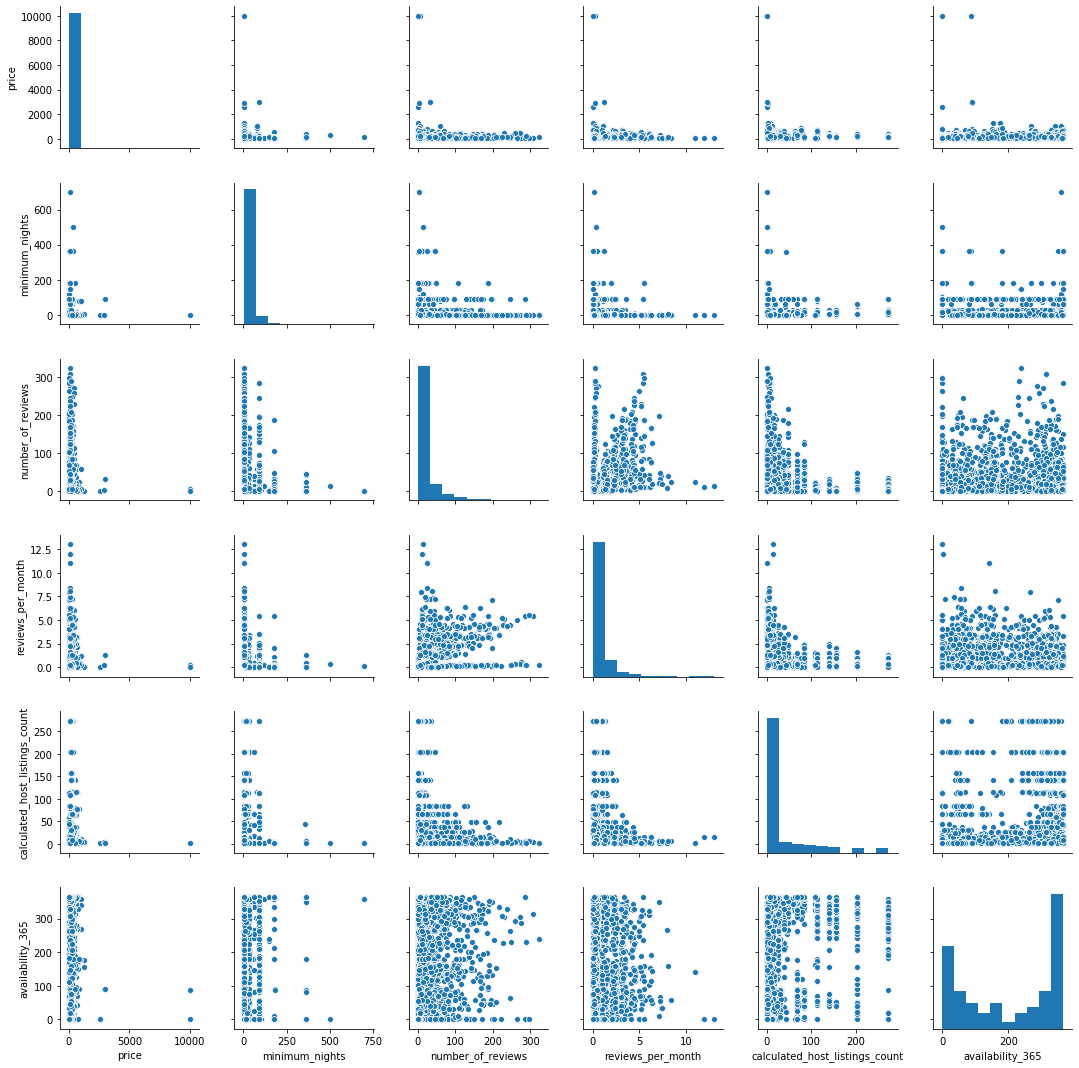

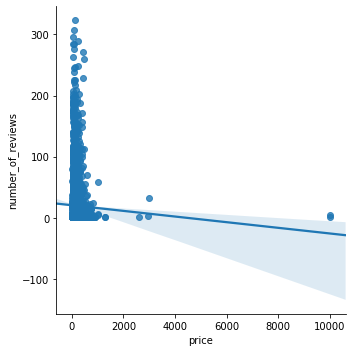

In [36]:
sb.pairplot(train)
sb.lmplot( "price", "number_of_reviews", data = train)
plt.show()

Melakukan Prediksi dari Linear Regression

In [37]:
prediction = regression.predict(test[["number_of_reviews"]])
for i in range(len(test)):
  print(test[["number_of_reviews"]].values[i], prediction[i])

print("MAE : ", mean_absolute_error(test[["price"]], prediction)) 
print("MSE : ", mean_squared_error(test[["price"]], prediction))
print("R2 : ", r2_score(test[["price"]], prediction))


[2] [155.9952914]
[22] [151.04903988]
[4] [155.50066625]
[4] [155.50066625]
[29] [149.31785185]
[214] [103.5650253]
[9] [154.26410337]
[18] [152.03829019]
[3] [155.74797883]
[3] [155.74797883]
[2] [155.9952914]
[1] [156.24260398]
[193] [108.75858939]
[6] [155.0060411]
[7] [154.75872852]
[4] [155.50066625]
[22] [151.04903988]
[4] [155.50066625]
[11] [153.76947822]
[1] [156.24260398]
[3] [155.74797883]
[9] [154.26410337]
[23] [150.80172731]
[2] [155.9952914]
[2] [155.9952914]
[4] [155.50066625]
[4] [155.50066625]
[4] [155.50066625]
[12] [153.52216564]
[2] [155.9952914]
[121] [126.56509486]
[37] [147.33935124]
[6] [155.0060411]
[9] [154.26410337]
[6] [155.0060411]
[5] [155.25335367]
[2] [155.9952914]
[5] [155.25335367]
[1] [156.24260398]
[12] [153.52216564]
[2] [155.9952914]
[4] [155.50066625]
[1] [156.24260398]
[8] [154.51141595]
[1] [156.24260398]
[1] [156.24260398]
[3] [155.74797883]
[31] [148.8232267]
[10] [154.01679079]
[1] [156.24260398]
[10] [154.01679079]
[1] [156.24260398]
[1] [1

# Classification - KNN

Import all required packages

In [38]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Read Listings.csv

In [39]:
dataset = pd.read_csv("listings.csv", delimiter=";")
dataset["reviews_per_month"] = dataset["reviews_per_month"].replace(",", ".", regex=True)
dataset = dataset.dropna()
dataset = dataset.astype({"price" : "int32", "minimum_nights" : "int32", "number_of_reviews" : "int32", 
                          "calculated_host_listings_count" : "int32", "availability_365" : "int32", 
                          "reviews_per_month" : "float64"})
dataset["last_review"] = pd.to_datetime(dataset["last_review"], format= "%d/%m/%Y")
print(dataset["room_type"].unique())
dataset["room_type"] = pd.Categorical(dataset["room_type"], dataset["room_type"].unique())
dataset["room_type"] = dataset["room_type"].cat.rename_categories([1,2,3])
print(dataset.dtypes)
print(dataset.isna().values.any())
print(dataset.head())

train, test = train_test_split(dataset, test_size=0.2)


['Private room' 'Entire home/apt' 'Shared room']
id                                        object
name                                      object
host_id                                   object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                  object
longitude                                 object
room_type                               category
price                                      int32
minimum_nights                             int32
number_of_reviews                          int32
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int32
availability_365                           int32
dtype: object
False
      id                                 name host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2  266763  Francesca   
1  50646   

Training Process

In [40]:
KNN = KNeighborsClassifier(n_neighbors = 3).fit(train[["price", "number_of_reviews", "minimum_nights", 
                                                       "reviews_per_month", "calculated_host_listings_count", 
                                                      "availability_365"]], train["room_type"])

Evaluasi

In [41]:

classification = KNN.predict(test[["price", "number_of_reviews", "minimum_nights", "reviews_per_month", 
                                   "calculated_host_listings_count", "availability_365"]])
accuracy = accuracy_score(test["room_type"], classification)
MAE = mean_absolute_error(test["room_type"], classification)
MSE = mean_squared_error(test["room_type"], classification)

print(" ACC : %.2f" % accuracy)
print(" MAE : %.2f" % MAE)
print(" MSE : %.2f" % MSE)


 ACC : 0.83
 MAE : 0.21
 MSE : 0.27


Identify the best K

In [47]:
Ks = 20
accuracy = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1, Ks):    
    KNN = KNeighborsClassifier(n_neighbors = n).fit(train[["price", "number_of_reviews", "minimum_nights", 
                                                           "reviews_per_month", "calculated_host_listings_count", 
                                                           "availability_365"]], train["room_type"])  
    classification = KNN.predict(test[["price", "number_of_reviews", "minimum_nights", "reviews_per_month", 
                                   "calculated_host_listings_count", "availability_365"]])
    accuracy[n - 1] = accuracy_score(test["room_type"], classification)
    
print("Best Accuracy : %.2f" % accuracy.max(), " with k = ", accuracy.argmax() + 1)


Best Accuracy : 0.84  with k =  13
